In [46]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc1_array

toa6[0:5] is [268, 267, 270, 269, 269]
tot6[0:50] is [71, 70, 71, 71, 71, 73, 71, 72, 71, 70, 71, 71, 71, 71, 69, 72, 70, 71, 70, 70, 70, 70, 71, 70, 71, 73, 70, 72, 69, 71, 71, 71, 72, 71, 70, 70, 70, 70, 70, 71, 71, 70, 70, 71, 71, 71, 71, 70, 71, 71]
cal6[0:5] is [171, 171, 171, 171, 171]
hit_index is []


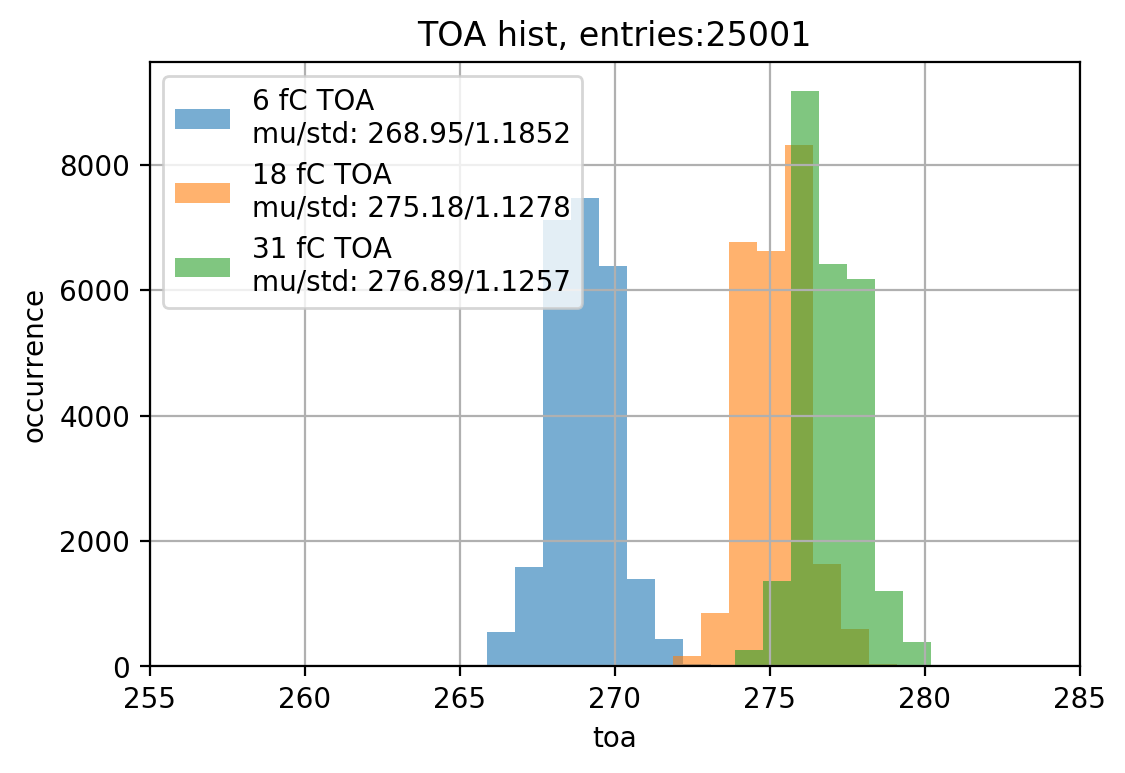

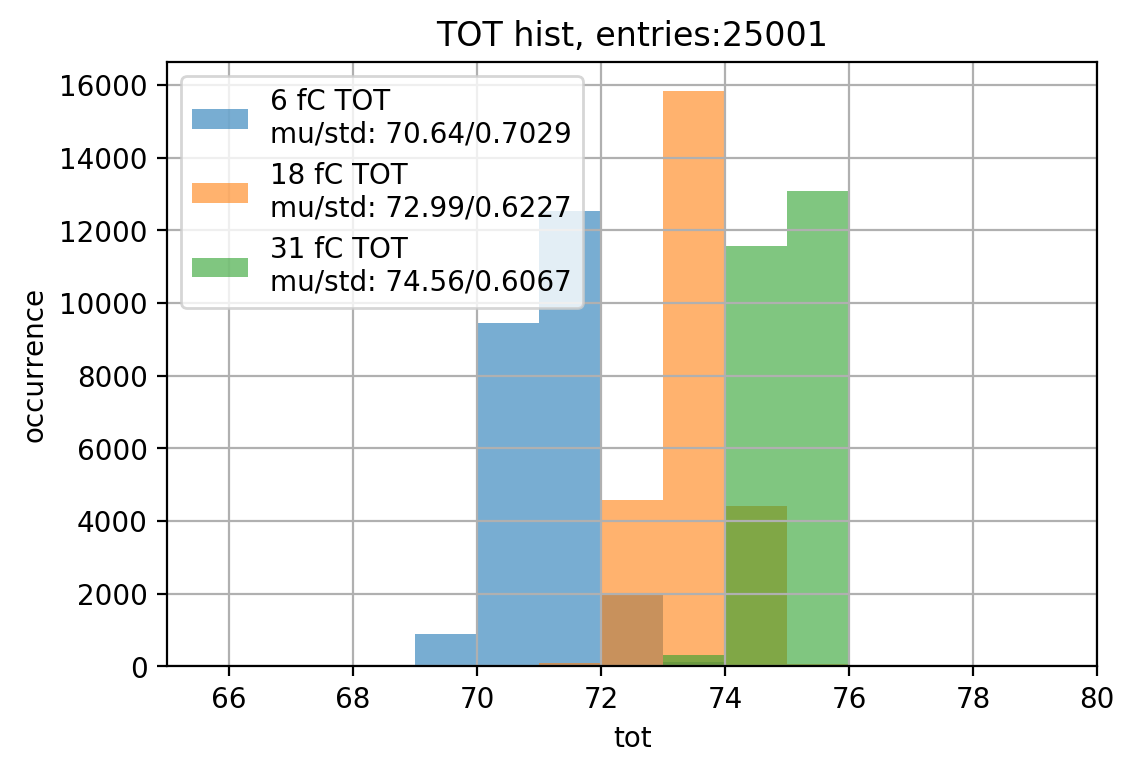

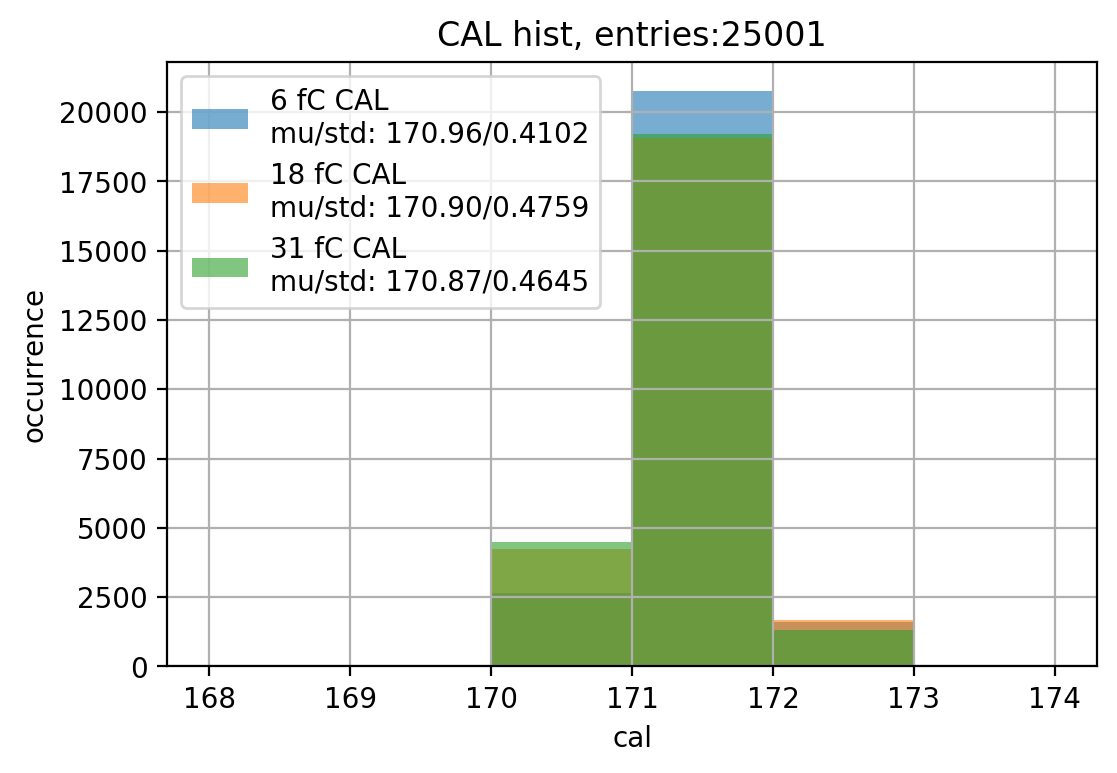

In [49]:
# path = '../../../CMS ETL ASIC/ETROC1/test/test results/SMU/ETROC1 arrary at smu/2020-06-30_Array_Test_Results/'
path = './'
file_in6 = 'Array_Data_Pixel=15_DAC_P15=409_QSel=6_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-22-24.dat'
file_in18 = 'Array_Data_Pixel=15_DAC_P15=409_QSel=18_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-23-08.dat'
file_in31 = 'Array_Data_Pixel=15_DAC_P15=409_QSel=31_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-24-15.dat'


f_r = open(path+file_in6, 'r')
lines6 = f_r.readlines()
f_r.close()

f_r = open(path+file_in18, 'r')
lines18 = f_r.readlines()
f_r.close()

f_r = open(path+file_in31, 'r')
lines31 = f_r.readlines()
f_r.close()

num_lines6 = len(lines6)
num_lines18 = len(lines18)
num_lines31 = len(lines31)

start_evt=0

toa6 = []
tot6 = []
cal6 = []
hit_index6 = []
events6 = 0
for i in range (start_evt, num_lines6):
    line_item = lines6[i]
    if line_item.split(' ')[4][0] == '1':
        toa6.append(int(line_item.split(' ')[0]))
        tot6.append(int(line_item.split(' ')[2]))
        cal6.append(int(line_item.split(' ')[3]))
        hit_index6.append(i)
        events6 = events6 + 1
        
mu_toa6, std_toa6 = norm.fit(toa6)
mu_tot6, std_tot6 = norm.fit(tot6)
mu_cal6, std_cal6 = norm.fit(cal6)
        
toa18 = []
tot18 = []
cal18 = []
hit_index18 = []
events18 = 0
for i in range (start_evt, num_lines18):
    line_item = lines18[i]
    if line_item.split(' ')[4][0] == '1':
        toa18.append(int(line_item.split(' ')[0]))
        tot18.append(int(line_item.split(' ')[2]))
        cal18.append(int(line_item.split(' ')[3]))
        hit_index18.append(i)
        events18 = events18 + 1    

mu_toa18, std_toa18 = norm.fit(toa18)
mu_tot18, std_tot18 = norm.fit(tot18)
mu_cal18, std_cal18 = norm.fit(cal18)        
        
toa31 = []
tot31 = []
cal31 = []
hit_index31 = []
events31 = 0
for i in range (start_evt, num_lines31):
    line_item = lines31[i]
    if line_item.split(' ')[4][0] == '1':
        toa31.append(int(line_item.split(' ')[0]))
        tot31.append(int(line_item.split(' ')[2]))
        cal31.append(int(line_item.split(' ')[3]))
        hit_index18.append(i)
        events31 = events31 + 1 

mu_toa31, std_toa31 = norm.fit(toa31)
mu_tot31, std_tot31 = norm.fit(tot31)
mu_cal31, std_cal31 = norm.fit(cal31) 
    
num_bins = None

print('toa6[0:5] is', toa6[0:5])
print('tot6[0:50] is', tot6[0:50])
print('cal6[0:5] is', cal6[0:5])

print('hit_index is', hit_index31[0:50])


######### plot TOA hist #############
fig, ax1 = plt.subplots(dpi=200)
ax1.hist(toa6, label = '6 fC TOA\nmu/std: %.2f/%.4f'%(mu_toa6, std_toa6), alpha=0.6)
ax1.hist(toa18,  label = '18 fC TOA\nmu/std: %.2f/%.4f'%( mu_toa18, std_toa18), alpha=0.6)
ax1.hist(toa31, label = '31 fC TOA\nmu/std: %.2f/%.4f'%( mu_toa31, std_toa31), alpha=0.6)
ax1.set_xlim(left=255,right=285)
ax1.grid()
ax1.set(xlabel='toa', ylabel='occurrence',
       title='TOA hist, entries:%d'%(events6))
ax1.legend(loc='best')
plt.show()

tot_bins = [69, 70, 71, 72, 73, 74, 75, 76]
######### plot TOT hist #############
fig, ax1 = plt.subplots(dpi=200)
ax1.hist(tot6, bins= tot_bins, label = '6 fC TOT\nmu/std: %.2f/%.4f'%( mu_tot6, std_tot6), alpha=0.6)
ax1.hist(tot18, bins= tot_bins, label = '18 fC TOT\nmu/std: %.2f/%.4f'%( mu_tot18, std_tot18), alpha=0.6)
ax1.hist(tot31, bins= tot_bins, label = '31 fC TOT\nmu/std: %.2f/%.4f'%( mu_tot31, std_tot31), alpha=0.6)
ax1.set_xlim(left=65,right=80)
ax1.grid()
ax1.set(xlabel='tot', ylabel='occurrence',
       title='TOT hist, entries:%d'%(events6))
ax1.legend(loc='best')
plt.show()

cal_bins = [168, 169, 170, 171, 172, 173, 174]
######### plot TOT hist #############
fig, ax1 = plt.subplots(dpi=200)
ax1.hist(cal6, bins= cal_bins, label = '6 fC CAL\nmu/std: %.2f/%.4f'%( mu_cal6, std_cal6), alpha=0.6)
ax1.hist(cal18, bins= cal_bins, label = '18 fC CAL\nmu/std: %.2f/%.4f'%( mu_cal18, std_cal18), alpha=0.6)
ax1.hist(cal31, bins= cal_bins, label = '31 fC CAL\nmu/std: %.2f/%.4f'%( mu_cal31, std_cal31), alpha=0.6)
# ax1.set_xlim(left=60,right=80)
ax1.grid()
ax1.set(xlabel='cal', ylabel='occurrence',
       title='CAL hist, entries:%d'%(events6))
ax1.legend(loc='best')
plt.show()